## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data=pd.read_csv("C:\\Users\\deepa\\regression\\data.csv")

## Plotting Data

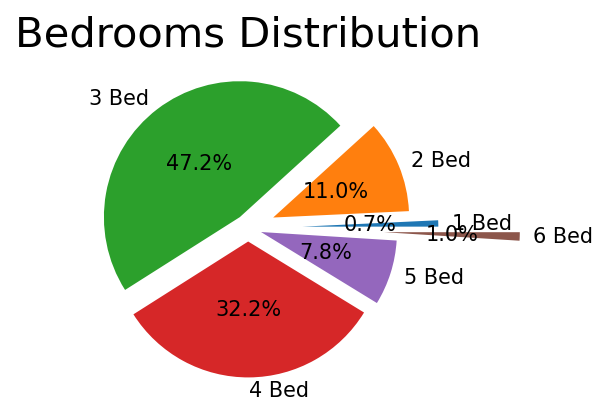

----------------------------------------------------------------------------------------------------------------------


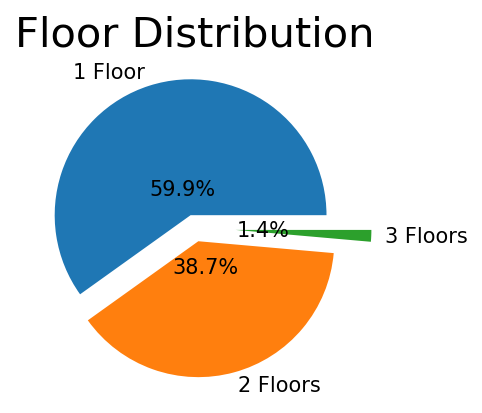

----------------------------------------------------------------------------------------------------------------------


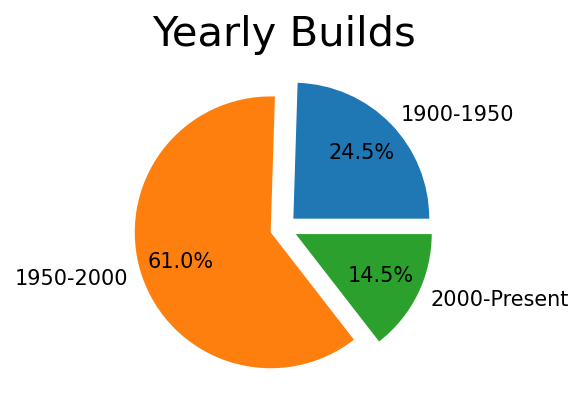

----------------------------------------------------------------------------------------------------------------------


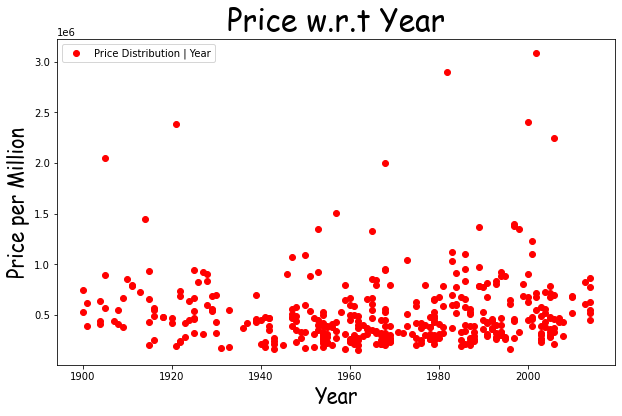

In [3]:
year1=data.loc[(data["yr_built"]>=1900)&(data["yr_built"]<=1949)].count()[0]
year2=data.loc[(data["yr_built"]>=1950)&(data["yr_built"]<=1999)].count()[0]
year3=data.loc[data["yr_built"]>=2000].count()[0]
bed1=data.loc[data["bedrooms"]==1].count()[0]
bed2=data.loc[data["bedrooms"]==2].count()[0]
bed3=data.loc[data["bedrooms"]==3].count()[0]
bed4=data.loc[data["bedrooms"]==4].count()[0]
bed5=data.loc[data["bedrooms"]==5].count()[0]
bed6=data.loc[data["bedrooms"]==6].count()[0]
floor1=data.loc[data["floors"]==1].count()[0]
floor2=data.loc[data["floors"]==2].count()[0]
floor3=data.loc[data["floors"]==3].count()[0]

explode=(0.4,.2,.1,.1,.1,1)
plt.figure(figsize=(5,3),dpi=150)
plt.pie([bed1,bed2,bed3,bed4,bed5,bed6],labels=["1 Bed","2 Bed","3 Bed","4 Bed","5 Bed","6 Bed"],autopct="%.1f%%",pctdistance=0.5,explode=explode)
plt.title("Bedrooms Distribution",fontdict={"fontsize":20})
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
explode=(.1,.1,.3)
plt.figure(figsize=(5,3),dpi=150)
plt.pie([floor1,floor2,floor3],labels=["1 Floor","2 Floors","3 Floors"],autopct="%.1f%%",pctdistance=0.2,explode=explode)
plt.title("Floor Distribution",fontdict={"fontsize":20})
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
explode=(.1,.1,.1)
plt.figure(figsize=(5,3),dpi=150)
plt.pie([year1,year2,year3],labels=["1900-1950","1950-2000","2000-Present"],autopct="%.1f%%",pctdistance=0.7,explode=explode)
plt.title("Yearly Builds",fontdict={"fontsize":20})
plt.show()
print("----------------------------------------------------------------------------------------------------------------------")
toll1=data["yr_built"]
toll2=data["price"]
plt.figure(figsize=(10, 6))
plt.title('Price w.r.t Year',fontdict={'fontname':'Comic Sans MS','fontsize':30})
plt.xlabel('Year',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('Price per Million',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.scatter(toll1,toll2, color='r', label='Price Distribution | Year')
plt.legend()
plt.show()

# Initial data

In [4]:
data

,id,bedrooms,floors,yr_built,price
0,7129300520,3,1.0,1955,221900.0
1,6414100192,3,2.0,1951,538000.0
2,5631500400,2,1.0,1933,180000.0
3,2487200875,4,1.0,1965,604000.0
4,1954400510,3,1.0,1987,510000.0
...,...,...,...,...,...
395,3649100320,2,1.0,1950,330000.0
396,7375300160,5,1.0,1958,530000.0
397,5175800060,4,1.0,1962,365000.0
398,1604601375,3,1.5,1909,378750.0


# Dropping Data Parts

In [5]:
data=data.drop(["id"],axis=1)

In [6]:
data.describe()

,bedrooms,floors,yr_built,price
count,400.000000,400.000000,400.000000,4.000000e+02
mean,3.382500,1.423750,1966.867500,5.200269e+05
std,0.847342,0.494137,28.473528,3.613449e+05
min,1.000000,1.000000,1900.000000,1.530000e+05
25%,3.000000,1.000000,1950.000000,2.997500e+05
50%,3.000000,1.000000,1968.000000,4.300000e+05
75%,4.000000,2.000000,1990.000000,6.266280e+05
max,6.000000,3.000000,2014.000000,3.080000e+06


## Features and Target Load

In [7]:
df=data.values
m=len(df[:,-1])
X=df[:,0:3]
Y=df[:,-1].reshape(m,1)
theta=np.zeros([4,1])

## Initializing Mean Normalization,Cost Function

In [8]:
def feature_scalling(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_normal=(X-mean)/std
    return X_normal,mean,std

In [9]:
def cost_function(X,Y,theta):
    m=len(Y)
    predictions=X.dot(theta)
    sq_err=(predictions-Y)**2
    cost=1/(2*m)*np.sum(sq_err)
    return cost

In [10]:
X,X_mean,X_std=feature_scalling(X)
X=np.append(np.ones((m,1)),X,axis=1)

In [11]:
cost_function(X,Y,theta)                                             ####Initial Cost Function#####

200335869922.49875

## Defining Gradient Descent

In [12]:
def gradient_descent(X,Y,theta,alpha,epochs):
    m=len(Y)
    history=[]
    
    for i in range(epochs):
        predictions=X.dot(theta)
        err=np.dot(X.transpose(),(predictions -Y))
        descent=alpha*(1/m)*err
        theta-=descent
        history.append(cost_function(X,Y,theta))
    return theta,history

In [13]:
theta,history=gradient_descent(X,Y,theta,0.1,100)

## Cost Function as Gradient Descent moves towards the Global Minimum

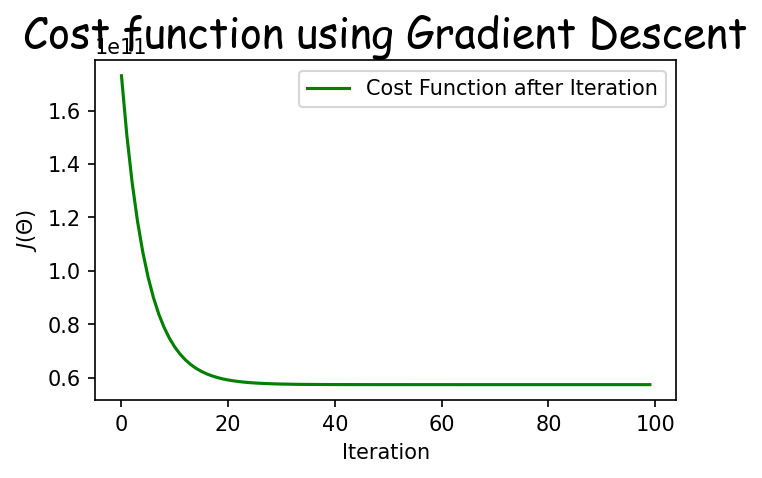

In [14]:
plt.figure(figsize=(5,3),dpi=150)
colors="green"
plt.plot(history,color=colors,label="Cost Function after Iteration")
plt.legend()
plt.title("Cost function using Gradient Descent",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.show()

## Hypothesis

In [15]:
print("h(x) = " +str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2  + " +str(round(theta[3,0],2))+"x3")

h(x) = 520013.11 + 101962.32x1 + 58564.35x2  + -25537.68x3


## Prediction

In [16]:
def predict(x,theta):
    predicted_value=np.dot(theta.transpose(),x)
    return predicted_value[0]

In [17]:
print("Enter your required specifications:-")
a=int(input("Number of Beds Required = "))
b=int(input("At which Floor = "))
c=int(input("Year Built = "))
x_sample= feature_scalling([a,b,c])[0]
x_sample=np.append(np.ones(1),x_sample)
predict=predict(x_sample,theta)
print("For house of {} bedrooms, on {} floor, built in year {}, we predict a price of ".format(a,b,c) +str(round(predict,0)))

Enter your required specifications:-
Number of Beds Required = 2
At which Floor = 3
Year Built = 2000
For house of 2 bedrooms, on 3 floor, built in year 2000, we predict a price of 370365.0
